In [25]:
# 1️⃣ Load Libraries
import joblib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    roc_curve, auc, precision_recall_curve, average_precision_score
)

# 2️⃣ Load Saved Data
X_train = joblib.load('../data/X_train.pkl')
X_test = joblib.load('../data/X_test.pkl')
y_train = joblib.load('../data/y_train.pkl')
y_test = joblib.load('../data/y_test.pkl')

print("✅ Data loaded successfully!")
print(f"Train size: {X_train.shape}, Test size: {X_test.shape}")


✅ Data loaded successfully!
Train size: (35918, 179053), Test size: (8980, 179053)


In [ ]:
# 2️⃣ Define more models with parameter grids

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

models = {
    'Logistic Regression': {
        'model': LogisticRegression(),
        'params': {
            'C': [0.01, 0.1, 1, 10],
            'solver': ['lbfgs', 'liblinear'],
            'max_iter': [300]
        }
    },
    'Naive Bayes': {
        'model': MultinomialNB(),
        'params': {
            'alpha': [0.1, 0.5, 1.0]
        }
    },
    'Linear SVM': {
        'model': LinearSVC(),
        'params': {
            'C': [0.01, 0.1, 1, 10],
            'max_iter': [1000]
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [100, 200],
            'max_depth': [None, 10, 50],
            'min_samples_split': [2, 5]
        }
    },
    'Decision Tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'max_depth': [None, 10, 20, 50],
            'min_samples_split': [2, 5, 10]
        }
    },
    'K-Nearest Neighbors': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5, 7, 9],
            'weights': ['uniform', 'distance']
        }
    },
    'Gradient Boosting': {
        'model': GradientBoostingClassifier(),
        'params': {
            'n_estimators': [100, 200],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 5, 10]
        }
    }
}

print("✅ More models and parameter grids defined!")


✅ More models and parameter grids defined!


In [10]:
# 3️⃣ Train, tune & evaluate all models (Smart: Grid for simple, Randomized for big)

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.exceptions import ConvergenceWarning
import warnings

warnings.filterwarnings("ignore", category=ConvergenceWarning)

# ✅ Optional: use a small sample for faster testing
X_train_sample = X_train[:2000]
y_train_sample = y_train[:2000]

best_estimators = {}
results = []

for name, mp in models.items():
    print(f"\n🔍 Tuning {name} ...")

    # Use RandomizedSearchCV for heavy models
    if name in ['Random Forest', 'Gradient Boosting']:
        search = RandomizedSearchCV(
            mp['model'],
            mp['params'],
            n_iter=5,  # Try only 5 random combos
            cv=3,
            scoring='accuracy',
            verbose=1,
            n_jobs=-1,
            random_state=42
        )
    else:
        search = GridSearchCV(
            mp['model'],
            mp['params'],
            cv=3,
            scoring='accuracy',
            verbose=1,
            n_jobs=-1
        )

    search.fit(X_train_sample, y_train_sample)
    best_estimators[name] = search.best_estimator_

    y_pred = search.best_estimator_.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results.append({
        'Model': name,
        'Best Parameters': search.best_params_,
        'CV Score': search.best_score_,
        'Test Accuracy': acc
    })

    print(f"✅ {name}")
    print("| Best Params: {search.best_params_}")
    print("| Test Accuracy: {acc:.4f}")

print("\n✅ Smart tuning complete for all models!")



🔍 Tuning Logistic Regression ...
Fitting 3 folds for each of 8 candidates, totalling 24 fits
✅ Logistic Regression | Best Params: {'C': 10, 'max_iter': 300, 'solver': 'liblinear'} | Test Accuracy: 0.9649

🔍 Tuning Naive Bayes ...
Fitting 3 folds for each of 3 candidates, totalling 9 fits
✅ Naive Bayes | Best Params: {'alpha': 0.1} | Test Accuracy: 0.9254

🔍 Tuning Linear SVM ...
Fitting 3 folds for each of 4 candidates, totalling 12 fits
✅ Linear SVM | Best Params: {'C': 1, 'max_iter': 1000} | Test Accuracy: 0.9692

🔍 Tuning Random Forest ...
Fitting 3 folds for each of 5 candidates, totalling 15 fits
✅ Random Forest | Best Params: {'n_estimators': 100, 'min_samples_split': 2, 'max_depth': 50} | Test Accuracy: 0.9535

🔍 Tuning Decision Tree ...
Fitting 3 folds for each of 12 candidates, totalling 36 fits
✅ Decision Tree | Best Params: {'max_depth': 50, 'min_samples_split': 2} | Test Accuracy: 0.9909

🔍 Tuning K-Nearest Neighbors ...
Fitting 3 folds for each of 8 candidates, totalling 

C:\Users\Aman Kumar\AppData\Local\Temp\ipykernel_7800\1656675653.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Test Accuracy', data=results_df, palette='viridis')


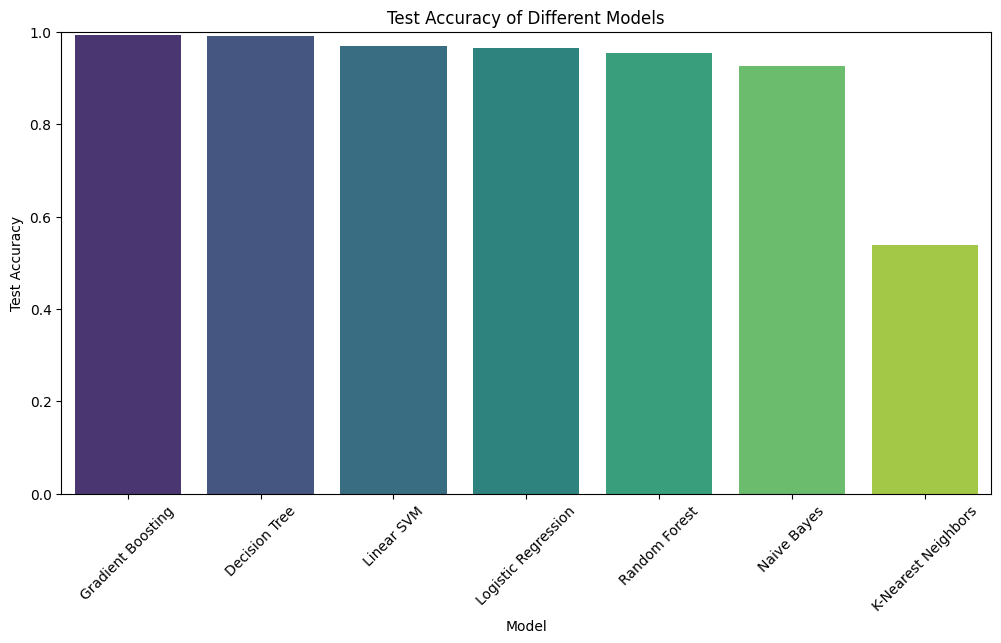

C:\Users\Aman Kumar\AppData\Local\Temp\ipykernel_7800\1656675653.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='CV Score', data=results_df, palette='magma')


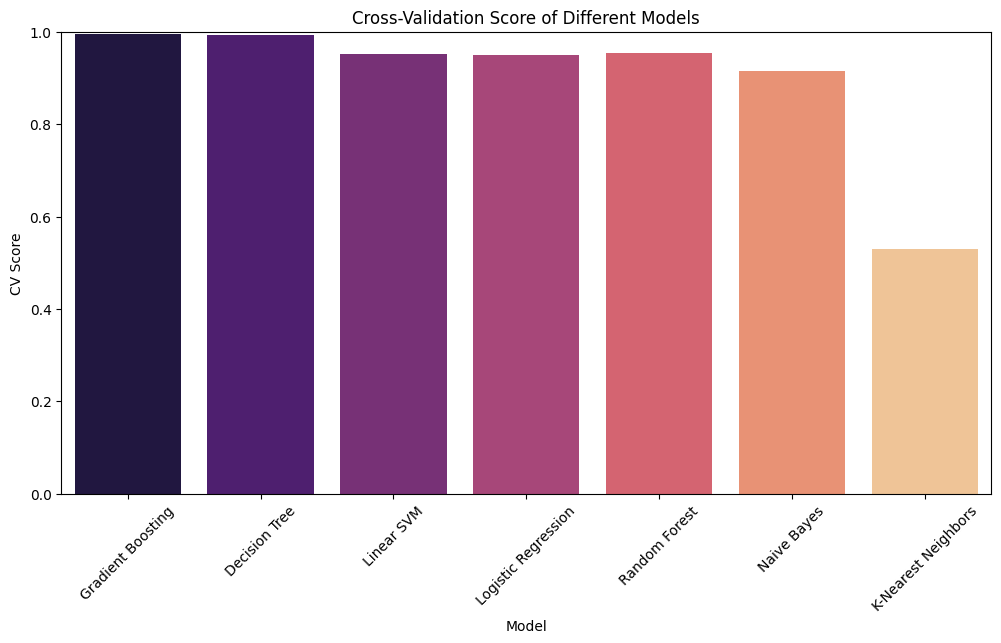

🔍 Comparison Table:


,Model,Best Parameters,CV Score,Test Accuracy
6,Gradient Boosting,"{'n_estimators': 200, 'max_depth': 3, 'learnin...",0.994500,0.993764
4,Decision Tree,"{'max_depth': 50, 'min_samples_split': 2}",0.993000,0.990869
2,Linear SVM,"{'C': 1, 'max_iter': 1000}",0.951000,0.969154
0,Logistic Regression,"{'C': 10, 'max_iter': 300, 'solver': 'liblinear'}",0.949502,0.964922
3,Random Forest,"{'n_estimators': 100, 'min_samples_split': 2, ...",0.954003,0.953452
1,Naive Bayes,{'alpha': 0.1},0.914002,0.925390
5,K-Nearest Neighbors,"{'n_neighbors': 3, 'weights': 'distance'}",0.529500,0.537751


In [11]:
# 4️⃣ Compare models visually

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert results list to DataFrame
results_df = pd.DataFrame(results)

# Sort by Test Accuracy
results_df = results_df.sort_values(by='Test Accuracy', ascending=False)

# Plot Test Accuracy and CV Score
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='Test Accuracy', data=results_df, palette='viridis')
plt.title('Test Accuracy of Different Models')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='CV Score', data=results_df, palette='magma')
plt.title('Cross-Validation Score of Different Models')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.show()

# Display table for reference
print("🔍 Comparison Table:")
display(results_df)
